# Mask Pattern Visualization

This notebook visualizes all the mask patterns implemented in `py/mask_pattern.py`.

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from elitho.mask_pattern import LinePattern, RandomLineSpacePattern

# Set random seed for reproducible results
np.random.seed(42)
import random
random.seed(42)

In [3]:
# Define visualization parameters
ndivx, ndivy = 2048, 2048  # Grid size for visualization

# Create instances of all mask patterns
patterns = {
    'HBF (Horizontal Bright Field)': LinePattern(cd=56, gap=80, direction="H", field_type="BF"),
    'VBF (Vertical Bright Field)': LinePattern(cd=56, gap=80, direction="V", field_type="BF"),
    'LSBF (Line Space Bright Field)': RandomLineSpacePattern(cd=60, fac=1, fac1d=3, field_type="BF"),
    'HDF (Horizontal Dark Field)': LinePattern(cd=56, gap=80, direction="H", field_type="DF"),
    'VDF (Vertical Dark Field)': LinePattern(cd=56, gap=80, direction="V", field_type="DF"),
    'LSDF (Line Space Dark Field)': RandomLineSpacePattern(cd=60, fac=1, fac1d=3, field_type="DF"),
}

print(f"Grid size: {ndivx} x {ndivy}")
print(f"Available patterns: {list(patterns.keys())}")

Grid size: 2048 x 2048
Available patterns: ['HBF (Horizontal Bright Field)', 'VBF (Vertical Bright Field)', 'LSBF (Line Space Bright Field)', 'HDF (Horizontal Dark Field)', 'VDF (Vertical Dark Field)', 'LSDF (Line Space Dark Field)']


HBF (Horizontal Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.643

VBF (Vertical Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.650

LSBF (Line Space Bright Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.514

HDF (Horizontal Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.360

VDF (Vertical Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.363

LSDF (Line Space Dark Field):
  Shape: (2048, 2048)
  Unique values: [0 1]
  Fill ratio (1s): 0.421



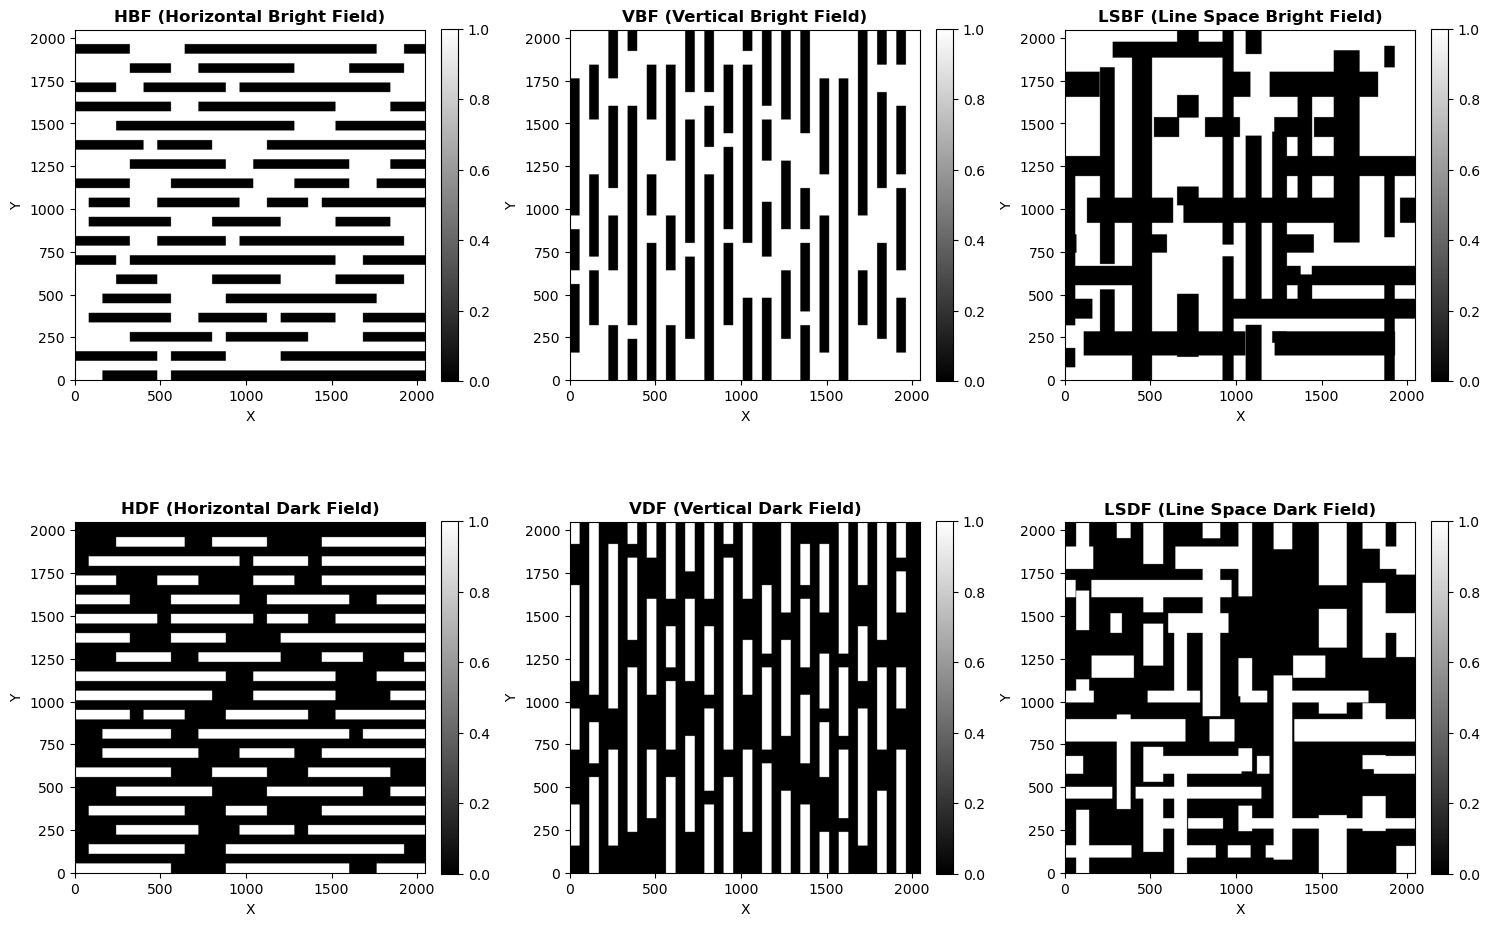

In [5]:
# Generate and visualize all patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, pattern) in enumerate(patterns.items()):
    # Generate mask pattern
    mask = pattern(ndivx, ndivy)

    # Plot the mask
    im = axes[i].imshow(mask, cmap='gray', origin='lower')
    axes[i].set_title(name, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    
    # Add colorbar
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    # Print statistics
    print(f"{name}:")
    print(f"  Shape: {mask.shape}")
    print(f"  Unique values: {np.unique(mask)}")
    print(f"  Fill ratio (1s): {np.mean(mask):.3f}")
    print()

plt.tight_layout()
plt.show()